### First I wrote a script to extract the repeats from the reads outputted by Chai Fungataman from DNAnexus. 

I made a CLINE version of this script below and ran it on the cluster. 

In [52]:
def TE_extractor(infile):
    
    import gzip
    
    TEs_in = gzip.open(infile, 'r')
    
    outpath = "%s/%s" % (infile.rpartition("/")[0], "Extracted_TEs.fa.gz")
    
    TEs_out = gzip.open(outpath, 'w')

    N_lines = 0


    for line in TEs_in:

        N_lines += 1

        if line.startswith(">prolog"):

            if N_lines > 1:

                if repeats == True:

                    for repeat in Repeat_coords:

                        TEs_out.write("%s_%s_%s\n" % (read_ID, Repeat_coords[repeat]["strt"], Repeat_coords[repeat]["end"]))
                        TEs_out.write("%s\n" % whole_seq[int(Repeat_coords[repeat]["strt"]):int(Repeat_coords[repeat]["end"])])

                        #print "%s_%s_%s" % (read_ID, Repeat_coords[repeat]["strt"], Repeat_coords[repeat]["end"])
                        #print whole_seq[int(Repeat_coords[repeat]["strt"]):int(Repeat_coords[repeat]["end"])]
                    #print Repeat_coords
                    #print whole_seq
                    #print N_lines

            repeats = False

            read_ID = line.strip()

            seq = []


        elif line.startswith("> rep"):


            repeats = True

            Repeat_coords = {}

            N_reps = 0

            for rep in line.split():

                if rep.startswith("["):
                    N_reps += 1

                    Repeat_coords[N_reps] = {}
                    Repeat_coords[N_reps]["strt"] = rep.split("[")[1].split(",")[0]
                    Repeat_coords[N_reps]["end"] = rep.split("]")[0].split(",")[1]


        elif all([repeats == True, not line.startswith(">")]):

            New_read = False

            seq.append(line.strip())
            whole_seq = "".join(seq)


    TEs_out.close()

In [53]:
### CLINE
import sys

input_file = sys.argv[1]

TE_extractor(input_file)


IOError: [Errno 2] No such file or directory: '-f'

Now I will take a look at the contents of the extracted repeats file - This file contains only the sequence that has been identified as repeats in the data. 

1st I will look at the sizes of the repeats

In [94]:
from Bio import SeqIO
from matplotlib import pyplot as plt

Extracted_repeats = SeqIO.parse(gzip.open("/home/djeffrie/Data/Genomes/Rtemp_hybrid/Repeats_and_masking/Extracted_Repeats.fa.gz", 'r'), "fasta")


In [95]:
count = 0
for record in Extracted_repeats :
    count += 1
    
print "%s repeat sequences" % count

22183417 repeat sequences


In [89]:
lengths = []
for record in Extracted_repeats :
    lengths.append(len(record.seq))

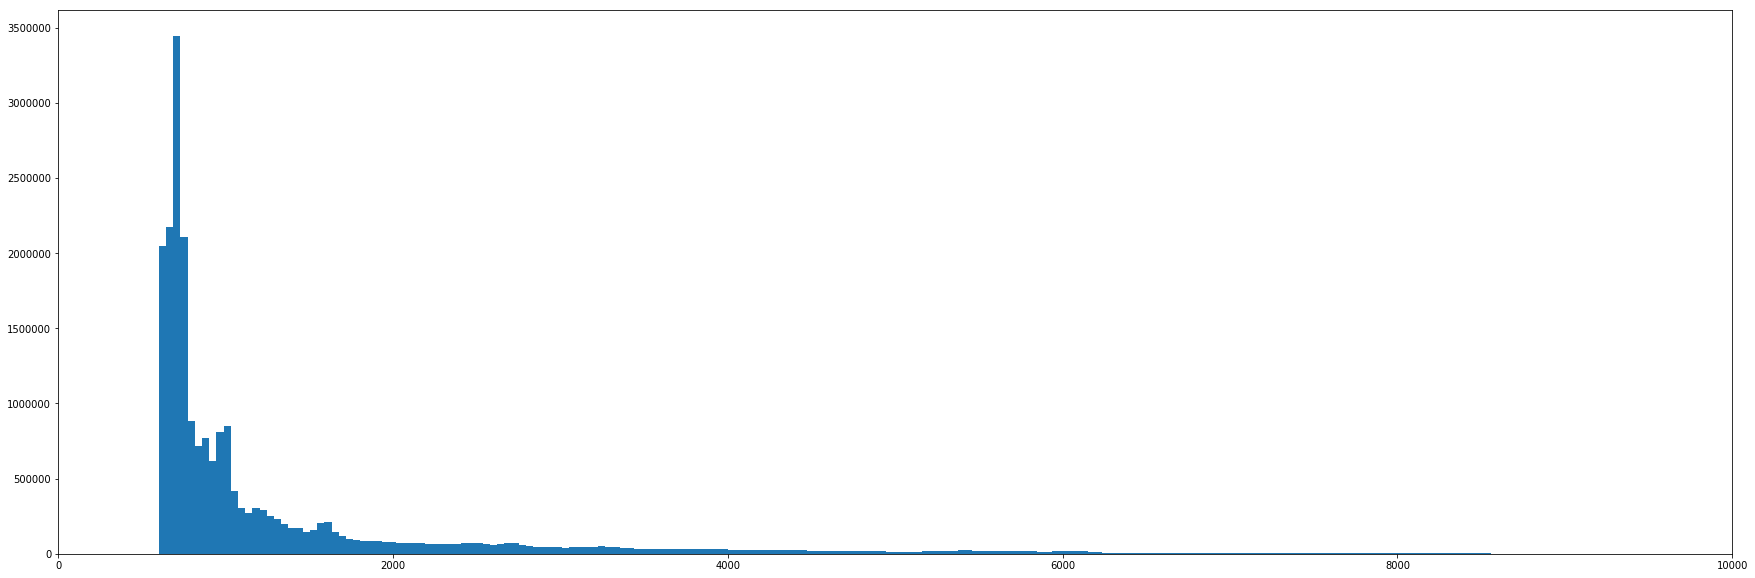

In [93]:
plt.figure(figsize = (30,10))
plt.hist(lengths, bins = 1000)
plt.xlim(0,10000)
plt.show()

In [96]:
import numpy as np

print np.mean(lengths)

1378.97587364
